importing relevent libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

Loading the data file

In [2]:
data = pd.read_excel("bUTLER_TRUCKING.xlsx")

In [3]:
data

,Driving Assignmnet,x1 = Miles Traveled,x2 = Number of Deliveries,y = Travel Time(hours)
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5,1,'linear regression ')

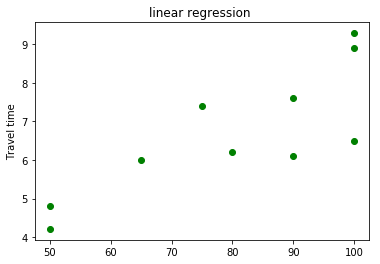

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['x1 = Miles Traveled'],data['y = Travel Time(hours)'], color = "green")
plt.ylabel('Travel time') 
plt.title('linear regression ') 

Text(0.5,1,'linear regression ')

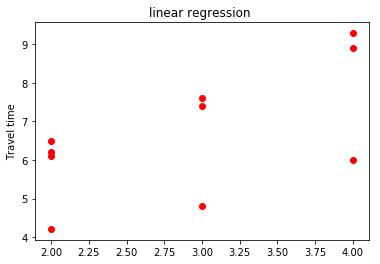

In [9]:
plt.figure()
plt. scatter(data['x2 = Number of Deliveries'], data['y = Travel Time(hours)'], color = "red")
plt.ylabel('Travel time') 
plt.title('linear regression ') 

Text(0.5,0,'x1 in green and x2 in red')

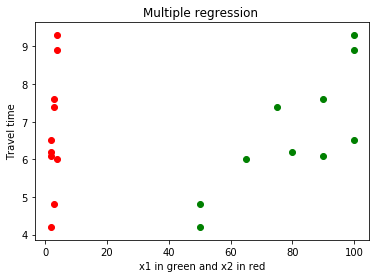

In [10]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data['x1 = Miles Traveled'],data['y = Travel Time(hours)'], color = "green")
plt. scatter(data['x2 = Number of Deliveries'], data['y = Travel Time(hours)'], color = "red")
plt.ylabel('Travel time') 
plt.title('Multiple regression ') 
plt.xlabel('x1 in green and x2 in red')

modeling the data

In [5]:
x = data[['x1 = Miles Traveled']]
y = data['y = Travel Time(hours)'].values.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

calculating coefficient

In [6]:
reg.coef_

array([[0.06782609]])

calculating intercept

In [7]:
reg.intercept_

array([1.27391304])

finding linear equation

In [8]:
print("The linear model is: y = {:.5} + {:.5}*Miles Traveled".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: y = 1.2739 + 0.067826*Miles Traveled


In [10]:
x = data['x1 = Miles Traveled']
y = data['y = Travel Time(hours)']

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

C:\temp\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                              OLS Regression Results                              
Dep. Variable:     y = Travel Time(hours)   R-squared:                       0.664
Model:                                OLS   Adj. R-squared:                  0.622
Method:                     Least Squares   F-statistic:                     15.81
Date:                    Tue, 03 Sep 2019   Prob (F-statistic):            0.00408
Time:                            06:53:53   Log-Likelihood:                -13.092
No. Observations:                      10   AIC:                             30.18
Df Residuals:                           8   BIC:                             30.79
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

C:\temp\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [28]:
x = data[['x1 = Miles Traveled', 'x2 = Number of Deliveries']]
y = data['y = Travel Time(hours)'].values.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
reg.coef_

array([[0.0611346 , 0.92342537]])

In [30]:
reg.intercept_

array([-0.86870147])

In [31]:
print("The linear model is: y = {:.5} + {:.5}*Miles Traveled+ {:.5}*Number of Deliveries".format(reg.intercept_[0], reg.coef_[0][0],reg.coef_[0][1]))

The linear model is: y = -0.8687 + 0.061135*Miles Traveled+ 0.92343*Number of Deliveries


In [4]:
x = np.column_stack((data['x1 = Miles Traveled'],data['x2 = Number of Deliveries']))
y = data['y = Travel Time(hours)']

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

C:\Users\Somi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                              OLS Regression Results                              
Dep. Variable:     y = Travel Time(hours)   R-squared:                       0.904
Model:                                OLS   Adj. R-squared:                  0.876
Method:                     Least Squares   F-statistic:                     32.88
Date:                    Sat, 07 Sep 2019   Prob (F-statistic):           0.000276
Time:                            11:02:22   Log-Likelihood:                -6.8398
No. Observations:                      10   AIC:                             19.68
Df Residuals:                           7   BIC:                             20.59
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

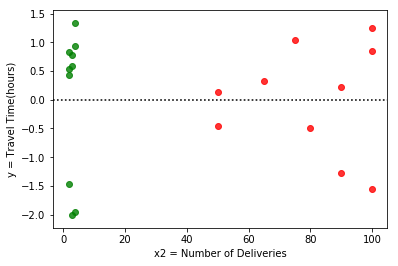

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(data['x1 = Miles Traveled'],y,color ='red')
sns.residplot(data['x2 = Number of Deliveries'],y, color= 'green')
plt.show()

In [12]:
sns.residplot?

In [13]:
influence = est2.get_influence() 
resid_student = influence.resid_studentized_external

In [14]:
resid_student

array([ 0.75938374, -0.32654491, -0.07719712, -1.39494328,  0.35709105,
        0.62519106,  2.0318718 , -2.21314094,  0.34311914, -0.75190409])

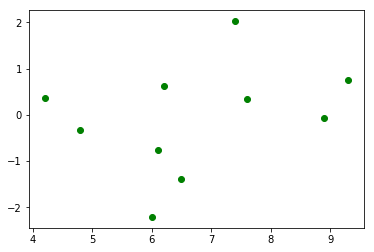

In [16]:
plt.figure()
plt.scatter(y,resid_student, color = "green")